In [1]:
import sys
import subprocess

if "google.colab" in sys.modules:
    subprocess.run(["sudo", "apt-get", "install", "-y", "fonts-nanum"])
    subprocess.run(["sudo", "fc-cache", "-fv"])
    subprocess.run(["rm", "-rf", "~/.cache/matplotlib"])
    # KoBERT와 sentencepiece 설치
    subprocess.run(["pip", "install", "git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf"])
    subprocess.run(["pip", "install", "sentencepiece"])
    subprocess.run(["pip", "install", "datasets"])




In [5]:
import sys
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/Othercomputers/내 MacBook Air/Documents/personal_llm_projects/dacon_merong/'
else:
    path = '../'

data_path =  path + 'data/' + '{}.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 한글 폰트 문제 해결
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if 'google.colab' in sys.modules:
    # 폰트 경로 찾기
    plt.rc('font', family='NanumBarunGothic')
    plt.rcParams['axes.unicode_minus'] =False

elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [6]:
second =  pd.read_csv(data_path.format('train_words_second'), index_col=0)
train = pd.read_csv(data_path.format('train'))
train_words = pd.read_csv(data_path.format('train_words'), index_col = 0)

In [7]:
train_words[:200]

,사고원인,재발방지대책 및 향후조치계획
0,"고소작업 중 추락 위험이 있음에도 불구하고, 안전난간대, 안전고리 착용 등 안전장치...",고소작업 시 추락 위험이 있는 부위에 안전장비 설치.
1,부주의,재발 방지 대책 마련과 안전교육 실시.
2,3층 슬라브 작업시 이동중 미끄러짐,현장자재 정리와 안전관리 철저를 통한 재발 방지 대책 및 공문 발송을 통한 향후 조...
3,"교각 기초철근 조립 중 강한 바람에 의해 기둥측 주철근이 균형을 잃고 전도되어, 하...","위험성 평가 및 교육을 통해 작업장 내 위험요인과 안전수칙을 근로자에게 전파하고, ..."
4,근로자의 부주의,자재 정리 작업 시 세부 작업 방법에 대한 교육 실시와 작업 구간 이동 경로 점검 ...
...,...,...
195,"1톤 트럭과 1톤 롤러가 서로 후진하면서, 피해자가 1톤 롤러 손잡이와 1톤 트럭 ...","근로자 특별교육, 1톤 트럭 후방카메라 설치, 작업방법 개선을 통한 사고예방 대책 ..."
196,장비운전자와 작업자 부주의,"장비운전자와 작업자의 소통 강화, 안전교육 실시, 중량물 하역 시 장비신호수 배치 ..."
197,2023. 12. 19(화) 15:10분경 113동 지하 5층에서 벽체 유로폼 해체...,사고 재발 방지 교육 실시.
198,"충분한 스트레칭을 하지 않아 신체 부하로 인한 근육 손상, 무리한 작업 동작","충분한 스트레칭 실시와 신체 부담에 대한 지속적인 교육, 안전교육 철저를 통한 재발..."


In [ ]:
predicted =  second.map(lambda x: x.split('### Response:\n')[-1])

In [ ]:
concated =  pd.concat([train_words[:200], predicted], axis=1)
concated.rename({"values" : 'predict'}, axis=1, inplace=True)

In [ ]:
n = 0
num = n * 10

for idx, row in concated.iloc[num: num + 10].iterrows():
    print(f'상황: {row[0]}')
    print(f'정답: {row[1]}')
    print(f'예측: {row[2]}')
    print('-' * 50)




상황: 고소작업 중 추락 위험이 있음에도 불구하고, 안전난간대, 안전고리 착용 등 안전장치가 미흡하였음.
정답: 고소작업 시 추락 위험이 있는 부위에 안전장비 설치.
예측: 안전교육 실시 및 안전관리 철저.
--------------------------------------------------
상황: 부주의
정답: 재발 방지 대책 마련과 안전교육 실시.
예측: 안전교육 실시 및 안전관리 철저.
--------------------------------------------------
상황: 3층 슬라브 작업시 이동중  미끄러짐
정답: 현장자재 정리와 안전관리 철저를 통한 재발 방지 대책 및 공문 발송을 통한 향후 조치 계획.
예측: 작업자 안전교육 실시 및 안전장비 착용 철저.
--------------------------------------------------
상황: 교각 기초철근 조립 중 강한 바람에 의해 기둥측 주철근이 균형을 잃고 전도되어, 하부에서 작업 중이던 철근공 2명이 철근에 부딪힌 사고
정답: 위험성 평가 및 교육을 통해 작업장 내 위험요인과 안전수칙을 근로자에게 전파하고, 근로자 안전교육을 강화하며, 본 사고와 관련된 유사 피해 발생 방지를 위한 안전교육을 실시할 계획.
예측: 작업자 안전교육 실시 및 현장 관리감독 철저.
--------------------------------------------------
상황: 근로자의 부주의
정답: 자재 정리 작업 시 세부 작업 방법에 대한 교육 실시와 작업 구간 이동 경로 점검 후 장애물 사전 정리 작업 실시.
예측: 작업 전 안전교육 실시와 작업장 내 위험요소 제거 및 관리감독 강화.
--------------------------------------------------
상황: 일정 거리를 두고 떨어져 있었지만 튕겨서 방향이 바뀔 것을 예상하고 좀 더 거리를 두었어야함
정답: 인근 작업장의 윈치양중 사고 강조 및 안전교육, 윈치양중 작업 최소화와 가능한 CAR작업 진행을 포함한 유사

<ipython-input-12-14bfbb3474a7>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'상황: {row[0]}')
<ipython-input-12-14bfbb3474a7>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'정답: {row[1]}')
<ipython-input-12-14bfbb3474a7>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'예측: {row[2]}')


In [ ]:
train.iloc[num : num + 10][['공사종류', '인적사고','장소','부위']]

,공사종류,인적사고,장소,부위
0,건축 / 건축물 / 근린생활시설,떨어짐(5미터 이상 ~ 10미터 미만),근린생활시설 / 내부,철근 / 고소
1,토목 / 터널 / 철도터널,끼임,철도터널 / 내부,볼트 / 바닥
2,건축 / 건축물 / 업무시설,넘어짐(미끄러짐),업무시설 / 내부,기타 / 바닥
3,토목 / 하천 / 기타,기타,기타 / 동산교 신축구간,교각 기초 / 바닥
4,건축 / 건축물 / 공동주택,넘어짐(미끄러짐),공동주택 / 내부,건설폐기물 / 바닥
5,건축 / 건축물 / 근린생활시설,물체에 맞음,근린생활시설 / 외부,자재 / 바닥
6,건축 / 건축물 / 교육연구시설,끼임,교육연구시설 / 외부,자재 / 고소
7,건축 / 건축물 / 교육연구시설,떨어짐(2미터 이상 ~ 3미터 미만),교육연구시설 / 외부,시스템동바리 / 계단
8,건축 / 건축물 / 공동주택,끼임,공동주택 / 내부,거푸집 / 바닥
9,조경 / 공원,떨어짐(10미터 이상),/ 외부,개구부 / 지하2층 개구부에서 추락


In [ ]:
train_pre =  pd.read_csv(data_path.format('train_preprocessed'))

In [ ]:
train_words_len =  train_words.map(lambda x: len(x), 'ignore').fillna(0).astype(int)

<Axes: >

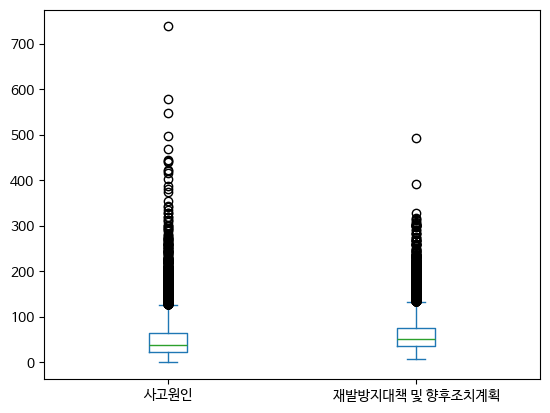

In [ ]:
train_words_len.plot(kind='box')

In [ ]:
train_pre.columns

Index(['ID', '발생일시', '사고인지 시간', '날씨', '기온', '습도', '대분류(공사장위치)', '중분류(공사장위치)',
       '소분류(공사장위치)', '극소분류(공사장위치)', '연면적', '층정보(지상)', '층정보(지하)', '인적사고',
       '물적사고', '대분류(공종)', '소분류(공종)', '대분류(사고객체)', '소분류(사고객체)', '작업프로세스',
       '대분류(장소)', '소분류(장소)', '기타분류(장소)', '대분류(다친위치)', '소분류(다친위치)', '사고원인',
       '재발방지대책 및 향후조치계획'],
      dtype='object')

In [ ]:
train_temp =  pd.concat([train_pre['인적사고'], train_words_len], axis=1)

In [ ]:
train_temp.head()

,인적사고,사고원인,재발방지대책 및 향후조치계획
0,떨어짐(5미터 이상 ~ 10미터 미만),54,29
1,끼임,3,21
2,넘어짐(미끄러짐),20,51
3,기타,75,101
4,넘어짐(미끄러짐),8,64


In [ ]:
train_temp.pivot_table(values='재발방지대책 및 향후조치계획', index='인적사고')

,재발방지대책 및 향후조치계획
인적사고,
감전,60.734694
교통사고,60.098361
기타,56.249086
깔림,65.184825
끼임,61.868576
넘어짐(기타),55.380514
넘어짐(물체에 걸림),57.768456
넘어짐(미끄러짐),58.016910
떨어짐(10미터 이상),64.200000


In [ ]:
hello = train_words[train['인적사고'].map(lambda x: x.startswith('넘어짐(물체에 걸림)'), 'ignore').fillna(False)]

<ipython-input-21-d4843477493a>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hello = train_words[train['인적사고'].map(lambda x: x.startswith('넘어짐(물체에 걸림)'), 'ignore').fillna(False)]


In [ ]:
hello

,사고원인,재발방지대책 및 향후조치계획
21,공사현장 내부 바닥자재에 걸려 넘어짐,자재 정리에 대한 강조와 재발 방지 대책.
31,작업자 부주위,"일일 T.B.M. 실시, 작업 방법 재주지, 해당 내용 위험성 평가 회의 진행 및 ..."
32,버림타설 후 동절기 보양천막 해체 작업 중 터파기 해 놓은 독립기초 상부 보양비닐을...,사고 재발 방지를 위한 안전 관리 철저와 대책 수립.
45,근로자 부주의로 인한 넘어짐,"근로자 보행 통로 구간 안전표지판 설치와 특별안전교육 실시, 일일 작업 투입 전 상..."
54,화재감시중 바닥자재에 걸려 넘어짐,"TBM 철저, 안전시설물 정비, 개인 건강관리 철저, 관리감독 강화 및 위험성 평가..."
...,...,...
23004,형틀공 송**씨가 기초 고정용 목재를 운반하던 중 보양된 철근 위를 밟고 지나가는 ...,건설공사 중 작업자 안전모 등의 안전보호장비 착용 준수 및 건설공사 안전사고 방지 ...
23152,비계 낙하,안전교육과 안전조치를 통한 재발 방지 대책 마련.
23283,보안경 미착용,보안경 착용상태에 대한 철저한 점검 및 관리감독.
23372,되메우기 작업구간 이동 중 돌을 밟고 발목 부상,해당 작업 위험요인에 대한 주지 교육 실시와 되메우기 작업구간 부석 정리 등 위험요...


In [ ]:
from kobert_tokenizer import KoBERTTokenizer
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/371k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


In [ ]:
n = 0
num = n * 10

for idx, row in hello.iloc[num: num + 10].iterrows():
    print(f'원인: {row[0]}')
    print(f'정답: {row[1]}')
    # print(f'예측: {row[2]}')
    print('-' * 50)

In [ ]:
mapper = {}

for i in hello['재발방지대책 및 향후조치계획']:
    input  = tokenizer.encode(
        i
    )
    for token in input:
        word = tokenizer.decode(token)
        if word in mapper.keys():
            mapper[word] +=1
        else:
            mapper[word] = 1

sorted_data = sorted(mapper.items(), key=lambda item: item[1], reverse=True)  # value 기준 정렬


### 임베드 확인

In [8]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load model from HuggingFace Hub
embed_tokenizer = AutoTokenizer.from_pretrained('jhgan/ko-sbert-sts')
embed_model = AutoModel.from_pretrained('jhgan/ko-sbert-sts').to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/538 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

In [ ]:
test_text =  pd.read_csv(data_path.format('train_words_second'), index_col=0).iloc[0,0].split('### Response:\n')[-1]


In [ ]:
# Tokenize sentences
encoded_input = embed_tokenizer([test_text], padding=True, truncation=True, return_tensors='pt').to(device)

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# Compute token embeddings
with torch.no_grad():
    test_output = embed_model(**encoded_input)

test_embeddings = mean_pooling(test_output, encoded_input['attention_mask'])



In [ ]:
embed_test =  torch.concat([test_embeddings for _ in range(964)])
embed_df =  pd.DataFrame(embed_test)

sub_samp =  pd.read_csv( data_path.format('sample_submission'))
sample_parsed =  pd.concat( [sub_samp.iloc[:, :2], embed_df], axis = 1 )
sample_parsed.to_csv(data_path.format('same_sample'), index=None)

In [ ]:
train =  pd.read_csv(data_path.format('train'))
train_words =  pd.read_csv(data_path.format('train_words'), index_col = 0)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.7 MB/s eta 0:00:00


In [10]:
from datasets import Dataset
from torch.utils.data import DataLoader

In [14]:
train_words_filled =  train_words.fillna('')
train_dataset  =  Dataset.from_pandas(train_words_filled)

dataloader = DataLoader(train_dataset, batch_size=32, shuffle=False)


In [ ]:
# next(iter(dataloader))['재발방지대책 및 향후조치계획']

In [ ]:
from tqdm.notebook import tqdm
from sklearn.metrics.pairwise import cosine_similarity


import numpy as np

temp = 1
cos_arrayes = None
for data in tqdm(dataloader):
    sentences = list(data['재발방지대책 및 향후조치계획'])
    encoded_input = embed_tokenizer(sentences, padding=True, truncation=True, return_tensors='pt').to(device)
    with torch.no_grad():
        model_output = embed_model(**encoded_input)

    # Perform pooling. In this case, mean pooling.
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

    cos_array = cosine_similarity(test_embeddings.cpu(), sentence_embeddings.cpu()).reshape(-1)

    # cos_arrayes에 배열을 수직으로 쌓기
    if cos_arrayes is None:
        cos_arrayes = cos_array  # 첫 번째 배열일 때는 그냥 할당
    else:
        cos_arrayes = np.concatenate((cos_arrayes, cos_array))  # 이후에는 vstack으로 쌓기

  0%|          | 0/732 [00:00<?, ?it/s]

In [ ]:
trains =  pd.DataFrame(cos_arrayes)
trains.to_csv(data_path.format('fundamental_cos_sim'), index=False)

In [ ]:
cos_arrayes =  cos_arrayes.reshape(-1)

array([0.404322  , 0.82069665, 0.59814125, 0.623958  , 0.38200632,
       0.48862138, 0.5612307 , 0.8119209 , 0.58489543, 0.6738274 ,
       0.61441135, 0.6429304 , 0.48615387, 0.69237626, 0.5591797 ,
       0.59703135, 0.7110125 , 0.45166755, 0.6081415 , 0.32548505,
       0.3397779 , 0.48059374, 0.5280692 , 0.6424607 , 0.49319333,
       0.4871313 , 0.62112755, 0.5617351 , 0.52647305, 0.75070363,
       0.54223806, 0.36252403, 0.65890217, 0.57591337, 0.5755176 ,
       0.7367445 , 0.49901372, 0.45760024, 0.33012277, 0.43846923,
       0.53034604, 0.77718246, 0.7138259 , 0.63607305, 0.7734673 ,
       0.5318076 , 0.5202365 , 0.39370912, 0.58077765, 0.50124687,
       0.47668964, 0.32812327, 0.40516737, 0.5920172 , 0.68385434,
       0.49224237, 0.49118957, 0.6018904 , 0.61316466, 0.5160614 ,
       0.4124422 , 0.4445821 , 0.49806035, 0.537527  ], dtype=float32)

In [ ]:
cos_arrayes

[array([[0.404322  , 0.82069665, 0.59814125, 0.623958  , 0.38200632,
         0.48862138, 0.5612307 , 0.8119209 , 0.58489543, 0.6738274 ,
         0.61441135, 0.6429304 , 0.48615387, 0.69237626, 0.5591797 ,
         0.59703135, 0.7110125 , 0.45166755, 0.6081415 , 0.32548505,
         0.3397779 , 0.48059374, 0.5280692 , 0.6424607 , 0.49319333,
         0.4871313 , 0.62112755, 0.5617351 , 0.52647305, 0.75070363,
         0.54223806, 0.36252403]], dtype=float32),
 array([[0.65890217, 0.57591337, 0.5755176 , 0.7367445 , 0.49901372,
         0.45760024, 0.33012277, 0.43846923, 0.53034604, 0.77718246,
         0.7138259 , 0.63607305, 0.7734673 , 0.5318076 , 0.5202365 ,
         0.39370912, 0.58077765, 0.50124687, 0.47668964, 0.32812327,
         0.40516737, 0.5920172 , 0.68385434, 0.49224237, 0.49118957,
         0.6018904 , 0.61316466, 0.5160614 , 0.4124422 , 0.4445821 ,
         0.49806035, 0.537527  ]], dtype=float32)]

In [ ]:





# Sentences we want sentence embeddings for
sentences = list(train_words.iloc[:10, 1])



# Tokenize sentences
encoded_input = embed_tokenizer(sentences, padding=True, truncation=True, return_tensors='pt').to('cuda')

# Compute token embeddings
with torch.no_grad():
    model_output = embed_model(**encoded_input)

# Perform pooling. In this case, mean pooling.
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.29 GiB. GPU 0 has a total capacity of 14.74 GiB of which 1.17 GiB is free. Process 7855 has 13.57 GiB memory in use. Of the allocated memory 13.27 GiB is allocated by PyTorch, and 179.75 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

### 확인보기

In [11]:
fcs =  pd.read_csv(data_path.format('fundamental_cos_sim'))
fcs.columns = ['cos_sim']
train_words_fcs =  pd.concat([train_words, fcs], axis=1)

In [12]:
train_words_high_cos = train_words_fcs[train_words_fcs['cos_sim'] > train_words_fcs['cos_sim'].mean()]
train_words_low_cos = train_words_fcs[train_words_fcs['cos_sim'] <= train_words_fcs['cos_sim'].mean()]

<Axes: >

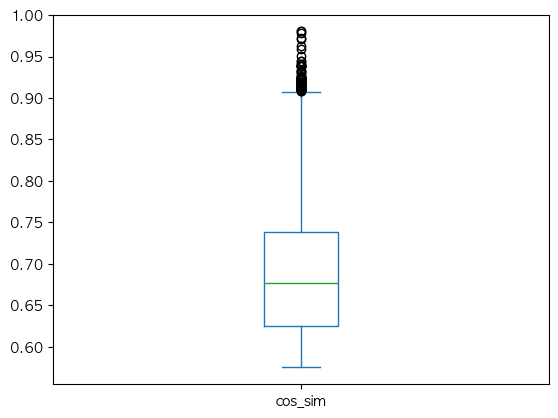

In [13]:
train_words_high_cos['cos_sim'].plot(kind='box')
# train_words_low_cos['cos_sim'].plot(kind='box')

In [14]:
what =  train_words_fcs[train_words_fcs['cos_sim'] <= 0.48]
train_true =  train.loc[what.index]
train_true_merged = pd.concat([train_true, what[['cos_sim']]], axis=1)
train_merged = pd.concat([train,train_words_fcs[['cos_sim']]], axis=1)


In [15]:
train_merged.pivot_table(index='인적사고', values='cos_sim', aggfunc='count').sort_values('cos_sim', ascending=False)

,cos_sim
인적사고,
물체에 맞음,3460
끼임,2549
넘어짐(미끄러짐),2188
넘어짐(기타),2063
기타,1915
부딪힘,1815
떨어짐(2미터 미만),1735
"절단, 베임",1661
넘어짐(물체에 걸림),1490


In [16]:
train_true_merged.pivot_table(index='인적사고', values='cos_sim', aggfunc='mean').sort_values('cos_sim', ascending=False)

,cos_sim
인적사고,
찔림,0.406366
떨어짐(3미터 이상 ~ 5미터 미만),0.395826
떨어짐(2미터 미만),0.394787
떨어짐(2미터 이상 ~ 3미터 미만),0.390080
"절단, 베임",0.389705
넘어짐(물체에 걸림),0.388905
떨어짐(분류불능),0.388340
화상,0.388221
물체에 맞음,0.385979


In [17]:
train_true_merged.pivot_table(index='인적사고', values='cos_sim', aggfunc=['mean', 'count'])

,mean,count
,cos_sim,cos_sim
인적사고,,
감전,0.361954,24
교통사고,0.360819,41
기타,0.379299,514
깔림,0.371264,160
끼임,0.385376,598
넘어짐(기타),0.383811,555
넘어짐(물체에 걸림),0.388905,394
넘어짐(미끄러짐),0.385529,541


In [18]:
train_words_true = train_words.loc[what.index]

In [19]:
# from tqdm.notebook import tqdm
# from sklearn.metrics.pairwise import cosine_similarity

# #Mean Pooling - Take attention mask into account for correct averaging
# def mean_pooling(model_output, attention_mask):
#     token_embeddings = model_output[0] #First element of model_output contains all token embeddings
#     input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
#     return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# import numpy as np

# temp = 1
# cos_arrayes = None
# for data in tqdm(dataloader):
#     sentences = list(data['재발방지대책 및 향후조치계획'])
#     encoded_input = embed_tokenizer(sentences, padding=True, truncation=True, return_tensors='pt').to(device)
#     with torch.no_grad():
#         model_output = embed_model(**encoded_input)

#     # Perform pooling. In this case, mean pooling.
#     sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

#     test_sentences = list(data['사고원인'])
#     test_encoded_input = embed_tokenizer(test_sentences, padding=True, truncation=True, return_tensors='pt').to(device)
#     with torch.no_grad():
#         test_model_output = embed_model(**test_encoded_input)

#     # Perform pooling. In this case, mean pooling.
#     test_sentence_embeddings = mean_pooling(test_model_output, test_encoded_input['attention_mask'])

#     for test, sentence in zip(test_sentence_embeddings.cpu(), sentence_embeddings.cpu()):
#         cos_array = cosine_similarity(test.reshape(1,-1), sentence.reshape(1,-1)).reshape(-1)

#     # cos_array = cosine_similarity(test_sentence_embeddings.cpu(), sentence_embeddings.cpu()).reshape(-1)

#     # cos_arrayes에 배열을 수직으로 쌓기
#         if cos_arrayes is None:
#             cos_arrayes = cos_array  # 첫 번째 배열일 때는 그냥 할당
#         else:
#             cos_arrayes = np.concatenate((cos_arrayes, cos_array))  # 이후에는 vstack으로 쌓기
#     temp +=1
#     break

# pd.DataFrame(cos_arrayes).to_csv(data_path.format('self_cos_sim'), index=False)

In [20]:
self_cos_sim =  pd.read_csv(data_path.format('self_cos_sim'))

In [21]:
train_words_sim2 = pd.concat([train_words_fcs, self_cos_sim], axis=1)
train_words_sim2.rename({'0' : 'self_sim'}, axis=1, inplace=True)

<Axes: >

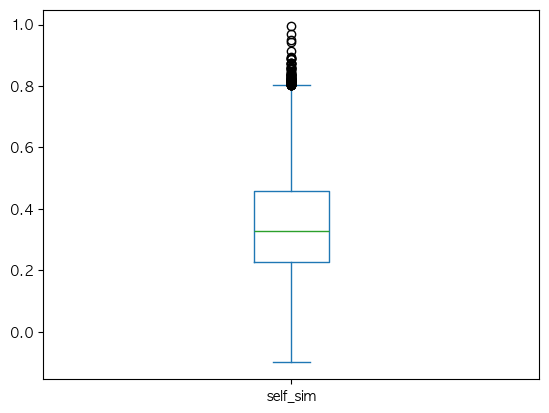

In [22]:
train_words_sim2['self_sim'].plot(kind='box')

In [24]:
train_words_diff = (train_words_sim2['cos_sim'] - train_words_sim2['self_sim'])

In [65]:
diff_mask =  (train_words_diff < train_words_diff.mean())
same_mask =  (train_words_fcs['cos_sim'] < train_words_fcs['cos_sim'].mean())
same4_mask =  (train_words_fcs['cos_sim'] < 0.45)
self_mask =  (train_words_sim2['self_sim'] < train_words_sim2['self_sim'].mean())

In [66]:
train_words_sim2[diff_mask]

n = 0
num = n * 10

for idx, row in train_words_sim2[diff_mask].iloc[num: num + 10].iterrows():
    print(f'원인: {row[0]}')
    print(f'정답: {row[1]}')
    print(f'기본샘플 유사도 :{row[2]}, 자기 유사도 : {row[3]}')
    # print(f'예측: {row[2]}')
    print('-' * 50)

원인: 고소작업 중 추락 위험이 있음에도 불구하고, 안전난간대, 안전고리 착용 등 안전장치가 미흡하였음.
정답: 고소작업 시 추락 위험이 있는 부위에 안전장비 설치.
기본샘플 유사도 :0.404322, 자기 유사도 : 0.8048424
--------------------------------------------------
원인: 근로자의 부주의
정답: 자재 정리 작업 시 세부 작업 방법에 대한 교육 실시와 작업 구간 이동 경로 점검 후 장애물 사전 정리 작업 실시.
기본샘플 유사도 :0.38200632, 자기 유사도 : 0.16993618
--------------------------------------------------
원인: 일정 거리를 두고 떨어져 있었지만 튕겨서 방향이 바뀔 것을 예상하고 좀 더 거리를 두었어야함
정답: 인근 작업장의 윈치양중 사고 강조 및 안전교육, 윈치양중 작업 최소화와 가능한 CAR작업 진행을 포함한 유사사고 재발 방지 대책 제출.
기본샘플 유사도 :0.48862138, 자기 유사도 : 0.27656025
--------------------------------------------------
원인: 사고자(000) 단독으로 임의작업 시행(작업계획 3층, 사고현장 1층)으로 안전고리 미착용 등 근로자 부주의, 2인이상 작업 미시행
정답: 공사 중지와 위험성 평가 재검토 및 재수립, 안전교육 시행, 현장 내 안전시설물 재점검 및 보강, 안전 보호 장비 착용 후 작업 시행, 위험성 평가 반영한 작업계획 수립 및 안전교육 실시, 작업방법에 대한 상시 관리감독 및 작업자 맞춤 안전교육 실시.
기본샘플 유사도 :0.61441135, 자기 유사도 : 0.47684845
--------------------------------------------------
원인: 1.작업자 단독작업 실시    2. 사다리 전도방지장치  및  2인1조 작업 미이행
정답: 특별교육 및 특수형태근로종사자교육 실시와 건설사고 발생에 따른 근로자 안전교

/var/folders/rb/qx02rx056vs8lh6bs_vyt2hw0000gn/T/ipykernel_2637/147676078.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'원인: {row[0]}')
/var/folders/rb/qx02rx056vs8lh6bs_vyt2hw0000gn/T/ipykernel_2637/147676078.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'정답: {row[1]}')
/var/folders/rb/qx02rx056vs8lh6bs_vyt2hw0000gn/T/ipykernel_2637/147676078.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'기본샘플

<Axes: >

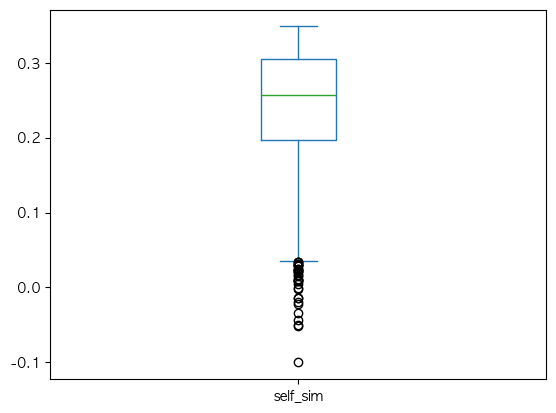

In [67]:
train_words_sim2[same_mask & self_mask]['self_sim'].plot(kind='box')

In [72]:
sad = train_words_sim2[same4_mask & self_mask]
sad

,사고원인,재발방지대책 및 향후조치계획,cos_sim,self_sim
4,근로자의 부주의,자재 정리 작업 시 세부 작업 방법에 대한 교육 실시와 작업 구간 이동 경로 점검 ...,0.382006,0.169936
19,넘어지는 타일을 지지하다 피하는 과정에서 타일에 왼쪽 발을 부딪힘,"양중 작업 시 기준무게(25kg) 이상 운반을 위한 2인 1조 작업 교육, 자재 전...",0.325485,0.340436
94,몰탈을 용기에 담아 1.2M 높이 발판에 올리려다 어깨에 통증을 느끼고 퇴근 후까지...,작업 전/중/후 수시로 스트레칭을 실시하고 소운반 작업 시 2인 1조 작업을 시행하...,0.364074,0.289615
143,차량 결함(브레이크 미작동),상하장소 변경 및 안전시설 보완을 통한 안전시공 이행계획.,0.357044,0.113131
161,현장내 207동 지상1층 스라브(콘판넬) 상부 이동 중 중심을 잃고 넘어지면서 적재...,안전통행로 주변 자재적치 금지 및 결빙구간 제거.,0.248661,0.251994
...,...,...,...,...
23388,하천 제방 예초 부산물 처리중 미끄러짐,작업상의 난이도나 위험성을 고려할 때 크게 위험한 상황이 아님에도 골밀도가 급격히 ...,0.443562,0.035101
23393,급성심장사 추정으로 사고로 분류하기 어려움,근로자의 건강상태 확인 후 작업에 투입토록 하는 조치.,0.342007,0.240276
23400,붕괴원인검토(2019.7.4)보고서1. 철거건물의 균형 무너짐- 뒤쪽부터 계단실 +...,사고 조사 결과에 따른 종합 대책 수립과 현장 조사 및 사고 조사 보고서 작성을 통...,0.294347,0.347001
23401,우측 무릎의 타박상,상부 작업 시 하부 통제구역 설정.,0.401835,0.112041


In [74]:
train_sad = train.loc[sad.index]
train_sad

,ID,발생일시,사고인지 시간,날씨,기온,습도,공사종류,연면적,층 정보,인적사고,물적사고,공종,사고객체,작업프로세스,장소,부위,사고원인,재발방지대책 및 향후조치계획
4,TRAIN_00004,2023-12-30 오전 10:00,정규작업 -,맑음,0℃,10%,건축 / 건축물 / 공동주택,"59,388.93㎡","지상 27층, 지하 3층",넘어짐(미끄러짐),없음,건축 > 해체 및 철거공사,기타 > 건설폐기물,해체작업,공동주택 / 내부,건설폐기물 / 바닥,근로자의 부주의,자재 정리 작업 시 세부 작업 방법에 대한 교육 실시와 작업 구간 이동 경로 점검 ...
19,TRAIN_00019,2023-12-29 오후 12:00,정규작업 -,맑음,4℃,70%,건축 / 건축물 / 공동주택,"207,997㎡","지상 34층, 지하 3층",부딪힘,없음,건축 > 타일 및 돌공사,건설자재 > 자재,양중작업,공동주택 / 외부,자재 / 바닥,넘어지는 타일을 지지하다 피하는 과정에서 타일에 왼쪽 발을 부딪힘,"양중 작업 시 기준무게(25kg) 이상 운반을 위한 2인 1조 작업 교육, 자재 전..."
94,TRAIN_00094,2023-12-26 오전 09:30,정규작업 -,맑음,2℃,60%,건축 / 건축물 / 업무시설,"72,175.33㎡","지상 11층, 지하 5층",기타,없음,건축 > 철근콘크리트공사,질병 > 질병,운반작업,업무시설 / 내부,질병 / 통증,몰탈을 용기에 담아 1.2M 높이 발판에 올리려다 어깨에 통증을 느끼고 퇴근 후까지...,작업 전/중/후 수시로 스트레칭을 실시하고 소운반 작업 시 2인 1조 작업을 시행하...
143,TRAIN_00143,2023-12-22 오전 09:00,정규작업 -,맑음,-5℃,44%,토목 / 기타 / 부지조성,-,-,떨어짐(3미터 이상 ~ 5미터 미만),없음,토목 > 토공사,건설기계 > 덤프트럭,반출작업,부지조성 / 인접주변,덤프트럭 / 앞,차량 결함(브레이크 미작동),상하장소 변경 및 안전시설 보완을 통한 안전시공 이행계획.
161,TRAIN_00161,2023-12-21 오전 09:40,기타 -,맑음,-10℃,45%,건축 / 건축물 / 공동주택,"82,053.92㎡","지상 15층, 지하 2층",넘어짐(미끄러짐),없음,건축 > 철근콘크리트공사,건설자재 > 데크플레이트,이동,공동주택 / 지상 1층,데크플레이트 / 하부(아래),현장내 207동 지상1층 스라브(콘판넬) 상부 이동 중 중심을 잃고 넘어지면서 적재...,안전통행로 주변 자재적치 금지 및 결빙구간 제거.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23388,TRAIN_23388,2019-07-05 오전 11:30,-,맑음,29℃,49%,조경 / 기타,-,-,넘어짐(기타),없음,토목 > 하천공사,토사 및 암반 > 경사면,NaN,/,경사면 /,하천 제방 예초 부산물 처리중 미끄러짐,작업상의 난이도나 위험성을 고려할 때 크게 위험한 상황이 아님에도 골밀도가 급격히 ...
23393,TRAIN_23393,2019-07-05 오전 09:50,-,맑음,24℃,59%,토목 / 하천 / 제방(통관/호안),-,-,질병,없음,토목 > 토공사,질병 > 질병,굴착작업,제방(통관/호안) /,질병 /,급성심장사 추정으로 사고로 분류하기 어려움,근로자의 건강상태 확인 후 작업에 투입토록 하는 조치.
23400,TRAIN_23400,2019-07-04 오후 02:23,-,맑음,33℃,60%,건축 / 건축물 / 근린생활시설,-,-,깔림,붕괴,건축 > 해체 및 철거공사,부재 > 슬래브,해체작업,근린생활시설 /,슬래브 /,붕괴원인검토(2019.7.4)보고서1. 철거건물의 균형 무너짐- 뒤쪽부터 계단실 +...,사고 조사 결과에 따른 종합 대책 수립과 현장 조사 및 사고 조사 보고서 작성을 통...
23401,TRAIN_23401,2019-07-04 오후 01:40,정규작업 -,안개,28℃,60%,건축 / 건축물 / 공장,"152,189㎡","지상 8층, 지하 1층",물체에 맞음,없음,기계설비 > 기계설비공사,건설자재 > 자재,설치작업,공장 / 지하1층 C7열,"자재 / 요추 2,3번 미세골절",우측 무릎의 타박상,상부 작업 시 하부 통제구역 설정.


In [70]:
n = 1
num = n * 10
df = sad

for idx, row in sad.iloc[num: num + 10].iterrows():
    print(f'{idx} 번째 샘플')
    print(f'원인: {row[0]}')
    print(f'정답: {row[1]}')
    print(f'기본샘플 유사도 :{row[2]}, 자기 유사도 : {row[3]}')
    # print(f'예측: {row[2]}')
    print('-' * 50)

211 번째 샘플
원인: 작업자 개인 부주의
정답: 보행자 이동구간 내 결빙구간 미끄럼 방지 조치 실시 및 해당 사고건 TBM 시 사고 사례 전파.
기본샘플 유사도 :0.35275865, 자기 유사도 : 0.24548328
--------------------------------------------------
240 번째 샘플
원인: 바람에 의한 염화칼슘 비산
정답: 직영팀 사고사례 전파 및 동종사례 방지를 위한 특별교육 실시와 신규자 채용 시 사고사례 교안 활용, 작업 전 작업방법 수립 및 TBM을 통한 위험요인 전파가 포함된 향후 조치 계획.
기본샘플 유사도 :0.43292353, 자기 유사도 : 0.07297899
--------------------------------------------------
261 번째 샘플
원인: 해체된 거푸집 정리 중 거푸집 사이 손가락 협착
정답: 안전교육 및 작업방법 변경(기구 이용) 실시
기본샘플 유사도 :0.44782084, 자기 유사도 : 0.17192417
--------------------------------------------------
280 번째 샘플
원인: 2023년 12월13일 오전 09시 20분경부터 30분경 사이에 옥상층에서 블록공들의 작업내용을 엄** 실장이 설명해주고 작업지시를 하였으며, 그때까지도 연도 덮개는 있었으며, 그 개구부 덮개위에서 작업지시를 하였다 합니다. 현장소장(홍** 소장)님도 옥상에서 창호업체하고 작업 협의를 하고 현장에 있었는데, 갑자기 9시40분경 2층 PS실로 조적공 1명이 추락하였다 하여, 작업자가 추락한 상황을 파악하였으며, 추락시 안전장구는 착용하고 있어서, 머리에 약간의 출혈만 보였으며, 작업자가 왜 옥상층 연도 개구부의 덮게를 치우고 추락했는지의 여부는 목격자가 없어서 확인은 안되고 있습니다. 추락발생시 곧바로 의식을 확인하고 재해예방기술지도 현장기술지도 요원이 응급조치하고  현장소장이 119에 긴급연락하여 10:00경 엠브란스가 도착하였고, 긴급조치

/var/folders/rb/qx02rx056vs8lh6bs_vyt2hw0000gn/T/ipykernel_2637/170716146.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'원인: {row[0]}')
/var/folders/rb/qx02rx056vs8lh6bs_vyt2hw0000gn/T/ipykernel_2637/170716146.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'정답: {row[1]}')
/var/folders/rb/qx02rx056vs8lh6bs_vyt2hw0000gn/T/ipykernel_2637/170716146.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'기본샘플

In [79]:
sad.loc[23388]

사고원인                                           하천 제방 예초 부산물 처리중 미끄러짐
재발방지대책 및 향후조치계획    작업상의 난이도나 위험성을 고려할 때 크게 위험한 상황이 아님에도 골밀도가 급격히 ...
cos_sim                                                     0.443562
self_sim                                                    0.035101
Name: 23388, dtype: object